In [85]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
indonesia  = requests.get("https://en.wikipedia.org/wiki/Indonesia")

In [87]:
from bs4 import BeautifulSoup

indonesia = BeautifulSoup(indonesia.content,"lxml")



In [88]:
indonesia_text= indonesia.getText(strip=True)

In [89]:
indonesia_text

'Indonesia - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Early history2.2Colonial era2.3Post-World War II3GeographyToggle Geography subsection3.1Climate3.2Geology3.3Biodiversity3.4Conservation4Government and politicsToggle Government and politics subsection4.1Parties and elections4.2Administrative divisions4.3Foreign relations4.4Military4.5Law enforcement and human rights5EconomyToggle Economy subsection5.1Tourism5.2Science and technology6InfrastructureToggle Infrastructure subsection6.1Transport6.2Energy7DemographicsToggle Demographics subsection7.1Ethnic groups and languages7.2Religion7.3Educ

In [90]:
indonesia_text = re.sub(r'\[\d+\]'," ",indonesia_text)
#Replace digits in [] or [23] with space
indonesia_text = re.sub(r'\(\w+\)'," ",indonesia_text)
#Replace digits in () or () with space
indonesia_text = re.sub(r'\[\w+\]'," ",indonesia_text)
#remove digits
indonesia_text= re.sub(r'[0-9]+'," ",indonesia_text)


In [91]:
indonesia_text=re.sub("\xa0°C"," ",indonesia_text)
indonesia_text = re.sub(r'\s+', ' ', indonesia_text)  # Normalize spaces


In [92]:
indonesia_text = re.sub(r'[^\w\s,.!?]', '', indonesia_text) 
indonesia_text = re.sub(r',', '', indonesia_text)

In [93]:
indonesia_text

'Indonesia  WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide Etymology HistoryToggle History subsection . Early history . Colonial era . PostWorld War II GeographyToggle Geography subsection . Climate . Geology . Biodiversity . Conservation Government and politicsToggle Government and politics subsection . Parties and elections . Administrative divisions . Foreign relations . Military . Law enforcement and human rights EconomyToggle Economy subsection . Tourism . Science and technology InfrastructureToggle Infrastructure subsection . Transport . Energy DemographicsToggle Demographics subsection . Ethnic groups and languages . Religion . Education .

In [94]:
from nltk.tokenize import sent_tokenize

In [95]:
indonesia_sentences = sent_tokenize(indonesia_text)

In [96]:
indonesia_sentences

['Indonesia  WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide Etymology HistoryToggle History subsection .',
 'Early history .',
 'Colonial era .',
 'PostWorld War II GeographyToggle Geography subsection .',
 'Climate .',
 'Geology .',
 'Biodiversity .',
 'Conservation Government and politicsToggle Government and politics subsection .',
 'Parties and elections .',
 'Administrative divisions .',
 'Foreign relations .',
 'Military .',
 'Law enforcement and human rights EconomyToggle Economy subsection .',
 'Tourism .',
 'Science and technology InfrastructureToggle Infrastructure subsection .',
 'Transport .',
 'Energy DemographicsToggle Demographics 

In [97]:
indonesia_sentences = pd.DataFrame(indonesia_sentences,columns=['sentence'])

In [98]:
indonesia_sentences

,sentence
0,Indonesia WikipediaJump to contentMain menuMa...
1,Early history .
2,Colonial era .
3,PostWorld War II GeographyToggle Geography sub...
4,Climate .
...,...
1457,Considered European for cultural political and...
1458,Aspecial administrative region of China partic...
1459,License additional terms may apply.
1460,By using this site you agree to theTerms of Us...


In [99]:
from textblob import TextBlob
sent1 = TextBlob("India is a great place")
sent1.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [100]:
indonesia_sentences

,sentence
0,Indonesia WikipediaJump to contentMain menuMa...
1,Early history .
2,Colonial era .
3,PostWorld War II GeographyToggle Geography sub...
4,Climate .
...,...
1457,Considered European for cultural political and...
1458,Aspecial administrative region of China partic...
1459,License additional terms may apply.
1460,By using this site you agree to theTerms of Us...


In [101]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [102]:
indonesia_sentences['sentiment']= [str(analyze_sentiment(x)) for x in indonesia_sentences.sentence]

In [103]:
indonesia_sentences['sentiment'].value_counts()

sentiment
Neutral     1040
Positive     331
Negative      91
Name: count, dtype: int64

In [104]:
from nltk.tokenize import word_tokenize
indonesia_words = word_tokenize(indonesia_text)

In [105]:
indonesia_words = [w.lower() for w in indonesia_words]
indonesia_words = [w for w in indonesia_words if w.isalnum()]

In [106]:
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words("english"))

In [107]:
indonesia_words = [w for w in indonesia_words if not w in english_stopwords]
indonesia_words = [w for w in indonesia_words if len(w)>2]

In [108]:
from nltk.probability import FreqDist
wordfreq = FreqDist(indonesia_words)

In [109]:
wordfreq.most_common(20)

[('indonesia', 188),
 ('retrieved', 137),
 ('january', 116),
 ('original', 96),
 ('indonesian', 59),
 ('december', 57),
 ('indonesias', 56),
 ('country', 42),
 ('international', 41),
 ('october', 40),
 ('march', 38),
 ('journal', 36),
 ('asia', 35),
 ('java', 34),
 ('national', 34),
 ('world', 34),
 ('development', 34),
 ('asian', 32),
 ('university', 31),
 ('southeast', 30)]

In [110]:
from wordcloud import WordCloud
indonesia_words = (" ").join(indonesia_words)

In [111]:
wordcloud = WordCloud(width=1000,height=500,stopwords="english_stopwords",max_words=100,colormap="plasma",collocations=False).generate(str(indonesia_words))

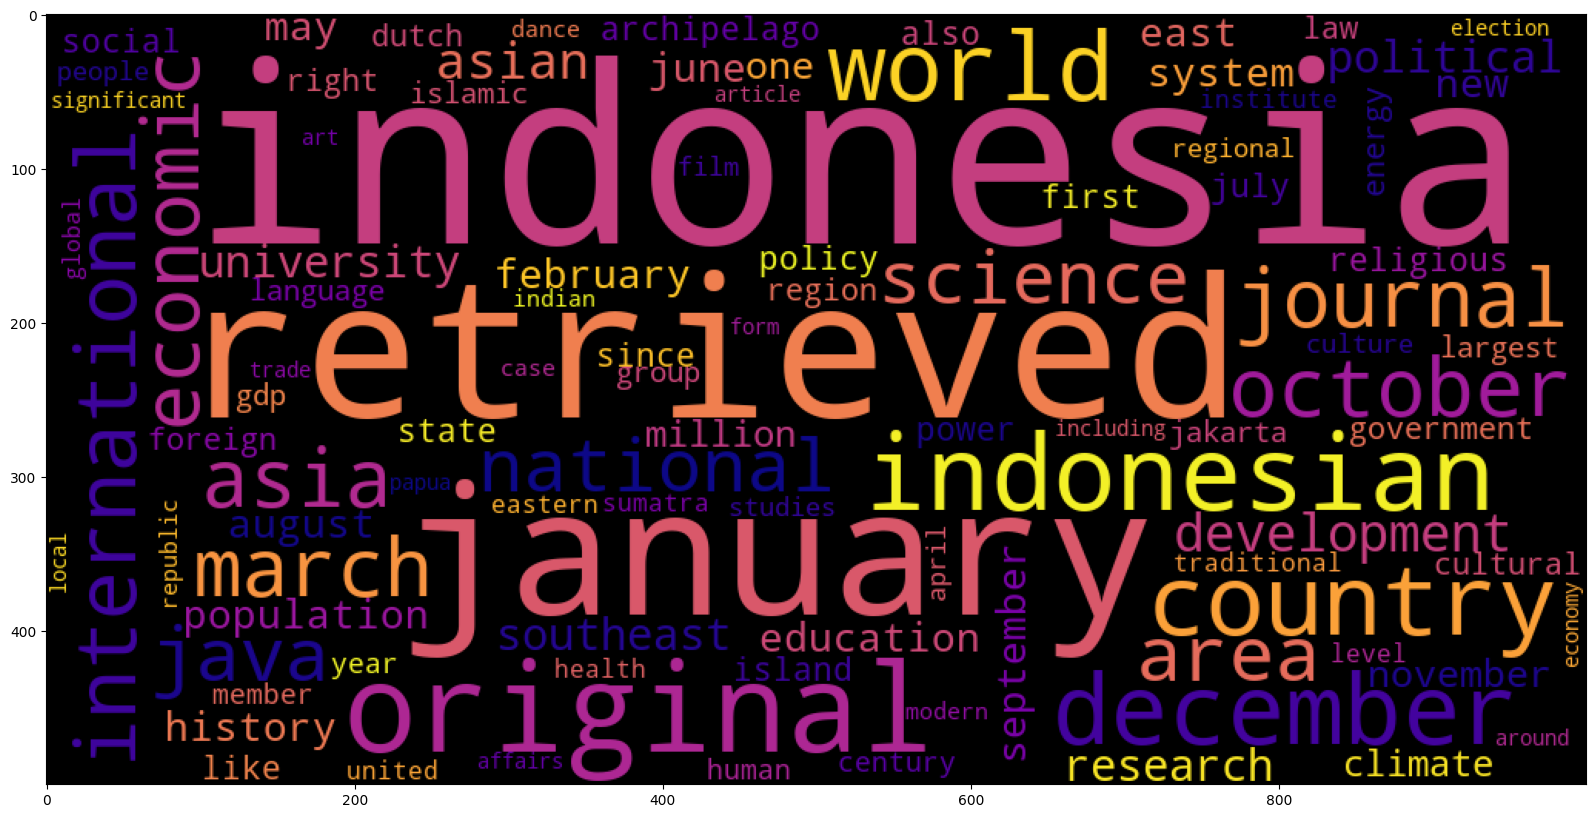

In [112]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [114]:
indonesia_sentences

,sentence,sentiment
0,Indonesia WikipediaJump to contentMain menuMa...,Neutral
1,Early history .,Positive
2,Colonial era .,Neutral
3,PostWorld War II GeographyToggle Geography sub...,Neutral
4,Climate .,Neutral
...,...,...
1457,Considered European for cultural political and...,Positive
1458,Aspecial administrative region of China partic...,Positive
1459,License additional terms may apply.,Neutral
1460,By using this site you agree to theTerms of Us...,Neutral


In [116]:
indonesia_sentences = indonesia_sentences[indonesia_sentences["sentiment"] != "Neutral"]

In [117]:
indonesia_sentences["sentiment_encoded"] = indonesia_sentences["sentiment"].map({"Negative": 0, "Positive": 1})


C:\Users\itssp\AppData\Local\Temp\ipykernel_12416\1332178522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesia_sentences["sentiment_encoded"] = indonesia_sentences["sentiment"].map({"Negative": 0, "Positive": 1})


In [160]:
indonesia_sentences.head()

,sentence,sentiment,sentiment_encoded
1,Early history .,Positive,1
10,Foreign relations .,Negative,0
11,Military .,Negative,0
28,Bibliography External linksToggle the table of...,Positive,1
29,For other uses seeIndonesia .Republic of Indon...,Negative,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data before applying TF-IDF
X_train, X_test, y_train, y_test = train_test_split(
    indonesia_sentences["sentence"], indonesia_sentences["sentiment_encoded"], 
    test_size=0.20, random_state=42
)


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

tfidf = TfidfVectorizer(max_features=1000, stop_words="english", ngram_range=(1,1))
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit only on training data
X_test_tfidf = tfidf.transform(X_test)  # Transform test data (no fitting)

In [121]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
y_pred_lr = lr.predict(X_test_tfidf)  # Use test data (no resampling!)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7411764705882353
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27        16
           1       0.83      0.86      0.84        69

    accuracy                           0.74        85
   macro avg       0.56      0.55      0.55        85
weighted avg       0.73      0.74      0.73        85



In [148]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=9,splitter="best")
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.788235294117647
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.25      0.31        16
           1       0.84      0.91      0.88        69

    accuracy                           0.79        85
   macro avg       0.62      0.58      0.59        85
weighted avg       0.76      0.79      0.77        85



In [158]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8117647058823529
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.85      0.93      0.89        69

    accuracy                           0.81        85
   macro avg       0.68      0.62      0.64        85
weighted avg       0.79      0.81      0.79        85



In [136]:
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test_tfidf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7529411764705882
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.12      0.16        16
           1       0.82      0.90      0.86        69

    accuracy                           0.75        85
   macro avg       0.52      0.51      0.51        85
weighted avg       0.70      0.75      0.72        85



In [155]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_tfidf)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.5294117647058824
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.69      0.35        16
           1       0.87      0.49      0.63        69

    accuracy                           0.53        85
   macro avg       0.56      0.59      0.49        85
weighted avg       0.75      0.53      0.58        85



In [156]:
import pickle

# ✅ Save the trained TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# ✅ Save the best trained model (Logistic Regression)
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("TF-IDF Vectorizer & Sentiment Model saved successfully!")


TF-IDF Vectorizer & Sentiment Model saved successfully!
